In [1]:
# install tensorflow
import tensorflow as tf

# notebook for an artificial neural network (ANN) to preform regression on synthetic data

this notebook is using data that has been created, not collected

using synthetic data is helpful to see how the NN is preforming before using it on real data

In [2]:
# other imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [18]:
# make the data
N = 1000

# input x: 2D datapoints uniformly distributed between (-3, +3)
X = np.random.random((N,2))* 6 - 3

# target y: chosen randomly, as a nonlinear function
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

print(np.max(Y), np.min(Y))

1.9993883842554654 -1.993835548961627


The above implements the nonlinear function: 
$$
Y = \text{cos}~(2X_1) + \text{cos}~(3X_1)
$$

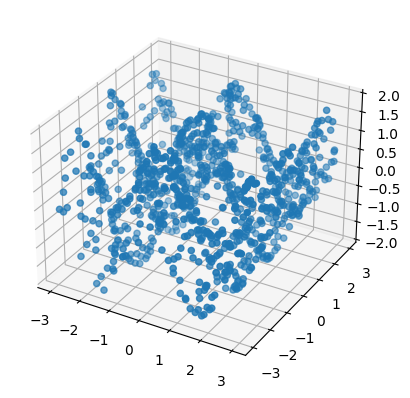

In [23]:
# plot the data on a 3D scatter plot to visualize it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
ax.set_zlim(-2,2)
plt.show()

In [24]:
# because the data is in the form NxD, there's no real preprocessing to do 
# so we can go ahead with building the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),  # hidden layer with 128 nodes
    tf.keras.layers.Dense(1)                                          # single output node, no activation for reg
])

In [25]:
# compile and fit the model
opt = tf.keras.optimizers.Adam(0.01)           # optimizer object w/ learning rate of 0.01
model.compile(optimizer=opt, loss='mse')       # MSE loss
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9833
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9416
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9093
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9152
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8840
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8050
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7504
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6634
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6088
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6709
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5385
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5255
Epoch 13/100
32/32 [=================

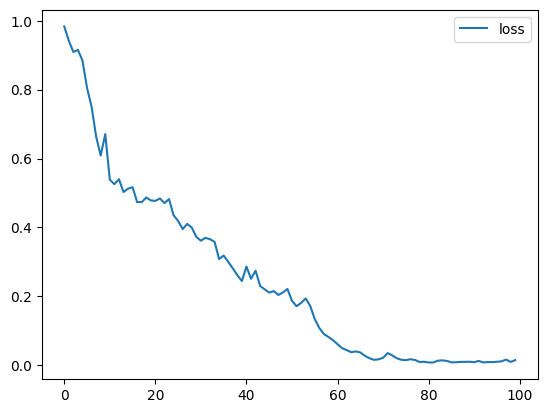

In [26]:
# plot the loss per iteration to check for convergence
plt.plot(r.history['loss'], label='loss')
plt.legend()
plt.show()

# if it doesn't converge, go back & modify hyperparams

79/79 [==============================] - 1s 7ms/step


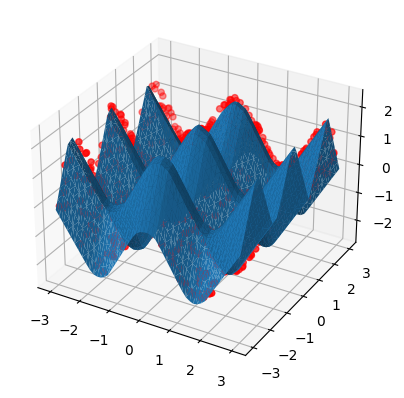

In [28]:
# now to make predictions using the data
# because the data is visualizable, we can plot prediction surface 

# original data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, color='red')

# add the prediction surface 
line = np.linspace(-3, 3, 50)                         # choosing even points bw (-3,3) for X1, X2
xx, yy = np.meshgrid(line, line)                      # create meshgrid, cross product between points
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T     # convert to (N,2) array to use as prediction input
Yhat = model.predict(Xgrid).flatten()                 # make prediction and flatten
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 1ms/step


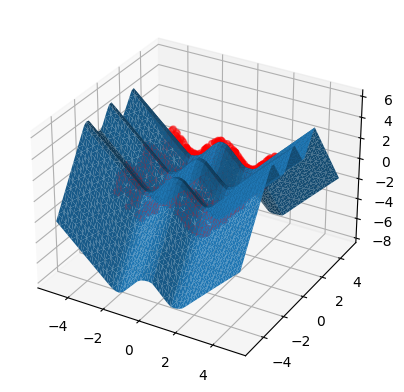

In [29]:
# test if the NN can extrapolate
# cosine repeats periodically bw (-inf, inf), so can it predict beyond (-3,3)?
# we'll check with another prediction surface plot

# original data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y, color='red')

# add the prediction surface 
line = np.linspace(-5, 5, 50)                         # larger domain than trained on, (-5,5)
xx, yy = np.meshgrid(line, line)                      # create meshgrid, cross product between points
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T     # convert to (N,2) array to use as prediction input
Yhat = model.predict(Xgrid).flatten()                 # make prediction and flatten
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()


# from the plot, you see it doesn't really work - and this is because the NN doesn't 
# use a periodic activation, so we can't expect it to change wrt inputs
# so it would need training on a different dataset